# S11 T01: Agrupa els diferents vols

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import centroid,fcluster
from scipy.spatial.distance import pdist
import matplotlib.cm as cm

## Exercici 1. Agrupa els diferents vols utilitzant l'algorisme de K-means.

De l'exercici S09_T01, hem guardat com a csv el dataframe vols05, que està net de NaN i que conté els dummies de CancellationCode. L'importem i extraiem informació.

In [32]:
vols = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/vols05.csv')#importem i li assignem un nom de dataframe

Observem l'estructura del dataframe. Hi ha un parell de columnes que no ens serveixen ("Unnamed") i les traiem conjuntament amb els dummies de l'sprint anterior, i els atributs categòrics que no siguin UniqueCarrier.

In [33]:
vols.describe()

,Unnamed: 0,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,A,B,C,N
count,1.936758e+06,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,9.683785e+05,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.604230e+03,1.634225e+03,...,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,5.805836e-02,1.629374e+01,1.270164e-04,1.585123e-04,4.130614e-05,9.996732e-01
std,5.590940e+05,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.557685e+02,4.646347e+02,...,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,3.585904e+01,1.126944e-02,1.258917e-02,6.426854e-03,1.807562e-02
min,0.000000e+00,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.841892e+05,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.313000e+03,1.325000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,9.683785e+05,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.714000e+03,1.705000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.452568e+06,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,...,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.936757e+06,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,...,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
vols.head()

,Unnamed: 0,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,A,B,C,N
0,0,0,2008,1,3,4,2003.0,1955,2211.0,2225,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,1,1,2008,1,3,4,754.0,735,1002.0,1000,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,2,2,2008,1,3,4,628.0,620,804.0,750,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,3,4,2008,1,3,4,1829.0,1755,1959.0,1925,...,0,2.0,0.0,0.0,0.0,32.0,0,0,0,1
4,4,5,2008,1,3,4,1940.0,1915,2121.0,2110,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [35]:
vols02=vols.drop(columns=["Unnamed: 0","Unnamed: 0.1","A","B","C","N","UniqueCarrier","Origin","Dest","CancellationCode"])

In [36]:
vols02.describe(include="all")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1936758,...,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N325SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.604230e+03,1.634225e+03,2.184263e+03,NaN,...,7.656862e+02,6.787964e+00,1.822792e+01,3.268348e-04,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,5.805836e-02,1.629374e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.557685e+02,4.646347e+02,1.944702e+03,NaN,...,5.744797e+02,5.280008e+00,1.433957e+01,1.807562e-02,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,3.585904e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.313000e+03,1.325000e+03,6.100000e+02,NaN,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.714000e+03,1.705000e+03,1.543000e+03,NaN,...,6.060000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,NaN,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01


In [37]:
vols02.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Separem els features o X, del target y, que serà  "TailNum". A partir d'aquí, reduirem el dataframe en 2 components principals mitjançant la tècnica PCA. Abans, cal estandaritzar X.

In [38]:
#Separació dataframe en features i target
vols03=vols02.drop(columns=["TailNum"])
X = vols03
y = vols02.TailNum
X = StandardScaler().fit_transform(X)
print(X)
print(y)

[[ 0.         -1.46763518 -1.45317667 ... -0.3444555  -0.03575169
  -0.45438328]
 [ 0.         -1.46763518 -1.45317667 ... -0.3444555  -0.03575169
  -0.45438328]
 [ 0.         -1.46763518 -1.45317667 ... -0.3444555  -0.03575169
  -0.45438328]
 ...
 [ 0.          1.69097395 -0.31374041 ...  0.33195211 -0.03575169
   1.74868807]
 [ 0.          1.69097395 -0.31374041 ... -0.3444555  -0.03575169
  -0.45438328]
 [ 0.          1.69097395 -0.31374041 ... -0.3444555  -0.03575169
  -0.45438328]]
0          N712SW
1          N772SW
2          N428WN
3          N464WN
4          N726SW
            ...  
1936753    N938DL
1936754    N3743H
1936755    N909DA
1936756    N646DL
1936757    N908DL
Name: TailNum, Length: 1936758, dtype: object


In [39]:
#Aplicació de la tècnica de reducció PCA (Principal Component Analysis) dels features en 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["component01", "component02"])
print(principalDf)

         component01  component02
0           0.138872     0.483841
1          -0.043787    -2.917269
2          -0.806142    -3.350457
3          -1.378799     0.683053
4          -0.553620     0.609684
...              ...          ...
1936753     0.513914    -0.786936
1936754    -0.239112    -1.648457
1936755     0.581274    -0.333205
1936756    -0.458951    -1.332353
1936757     0.029396    -1.858456

[1936758 rows x 2 columns]


In [40]:
print("Forma abans transformació: ",X.shape)
print("Forma després transformació: ",principalDf.shape)

Forma abans transformació:  (1936758, 24)
Forma després transformació:  (1936758, 2)


In [41]:
#Unió dels features i dels targets en un dataframe
vols04=principalDf.merge(y,left_index=True,right_index=True)
print(vols04)

         component01  component02 TailNum
0           0.138872     0.483841  N712SW
1          -0.043787    -2.917269  N772SW
2          -0.806142    -3.350457  N428WN
3          -1.378799     0.683053  N464WN
4          -0.553620     0.609684  N726SW
...              ...          ...     ...
1936753     0.513914    -0.786936  N938DL
1936754    -0.239112    -1.648457  N3743H
1936755     0.581274    -0.333205  N909DA
1936756    -0.458951    -1.332353  N646DL
1936757     0.029396    -1.858456  N908DL

[1936758 rows x 3 columns]


In [42]:
#Comprovem i agrupem el dataframe per TailNum
groups = vols04.groupby("TailNum").nunique()
print(groups.iloc[:,:])
print(groups.info())

         component01  component02
TailNum                          
0                  5            5
80009E           387          387
80019E           351          351
80059E           385          385
80129E           412          412
...              ...          ...
N998DL           376          376
N999CA            73           73
N999DN           394          394
NHZOAL            32           32
Unknow             3            3

[5367 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 5367 entries, 0 to Unknow
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   component01  5367 non-null   int64
 1   component02  5367 non-null   int64
dtypes: int64(2)
memory usage: 125.8+ KB
None


Tenim 5367 files de "TailNum", o vols agrupats.
Creem un gràfic del PCA per tenir una referència visual, i veure la distribució dels components principals per a cada un dels vols.

In [43]:
groups = vols04.groupby("TailNum")

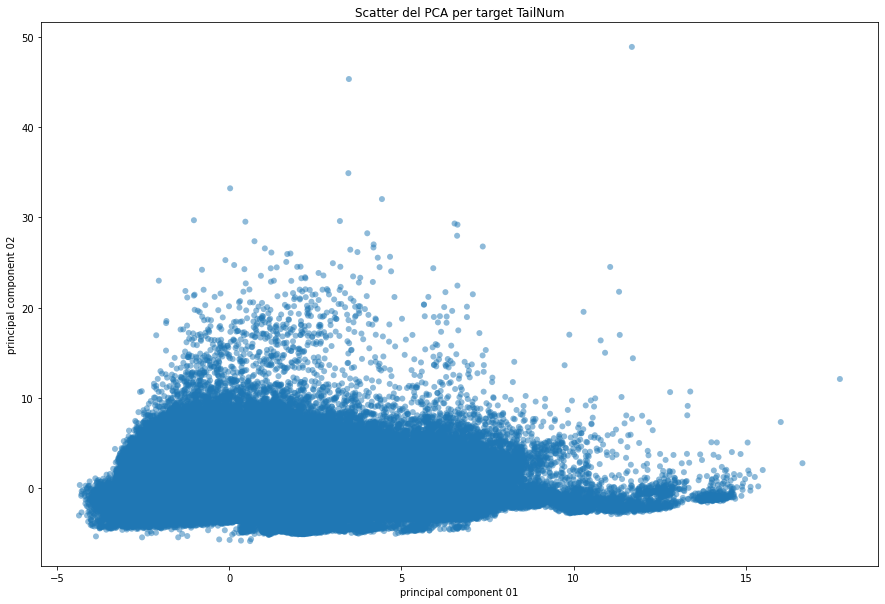

In [44]:
fig, ax1 = plt.subplots(figsize = (15, 10))
ax1.margins(0.05)

plt.scatter(vols04.iloc[:, 0], vols04.iloc[:, 1],edgecolor='none', alpha=0.5)
plt.title("Scatter del PCA per target TailNum",fontsize=12)
plt.xlabel("principal component 01")
plt.ylabel("principal component 02")
plt.show()

El gràfic no és gaire demostratiu, degut a què hem agrupat per vol i hi ha més de 5000. Tanmateix, ens ajuda a veure els límits de la distribució majoritària dels punts.

In [46]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
print(kmeans)

KMeans(init='random', n_clusters=3, random_state=42)


In [47]:
kmeans.fit(principalDf)

KMeans(init='random', n_clusters=3, random_state=42)

In [48]:
# The lowest SSE value
print("SSE de menor valor: ",kmeans.inertia_)
# Final locations of the centroid
print("Localització dels centroïds: ",kmeans.cluster_centers_)
# The number of iterations required to converge
print("Iteracions per convergir: ",kmeans.n_iter_)
#fifty predicted labels
print("Primeres 50 etiquetes predites: ",kmeans.labels_[:50])

SSE de menor valor:  5787698.29007534
Localització dels centroïds:  [[-0.61397383  1.57094828]
 [ 3.53417829 -0.29517512]
 [-0.83437857 -1.23730407]]
Iteracions per convergir:  9
Primeres 50 etiquetes predites:  [0 2 2 0 0 1 2 0 2 1 1 2 2 2 2 2 2 1 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 0
 2 2 2 0 2 0 2 0 2 2 2 2 2]


In [50]:
#Afegim una columna amb els valors dels clusters
vols04["Clusters"]=kmeans.fit_predict(principalDf)

In [52]:
print(vols04)
print(vols04.describe())

         component01  component02 TailNum  Clusters
0           0.138872     0.483841  N712SW         0
1          -0.043787    -2.917269  N772SW         2
2          -0.806142    -3.350457  N428WN         2
3          -1.378799     0.683053  N464WN         0
4          -0.553620     0.609684  N726SW         0
...              ...          ...     ...       ...
1936753     0.513914    -0.786936  N938DL         2
1936754    -0.239112    -1.648457  N3743H         2
1936755     0.581274    -0.333205  N909DA         2
1936756    -0.458951    -1.332353  N646DL         2
1936757     0.029396    -1.858456  N908DL         2

[1936758 rows x 4 columns]
        component01   component02      Clusters
count  1.936758e+06  1.936758e+06  1.936758e+06
mean   6.824087e-16 -8.015816e-16  1.063390e+00
std    2.026985e+00  1.766438e+00  9.076622e-01
min   -4.357387e+00 -5.879767e+00  0.000000e+00
25%   -1.487743e+00 -1.241964e+00  0.000000e+00
50%   -5.000877e-01 -7.248399e-02  1.000000e+00
75%    9.051

In [78]:
centroids=kmeans.cluster_centers_
print(centroids)

[[-0.61397383  1.57094828]
 [ 3.53417829 -0.29517512]
 [-0.83437857 -1.23730407]]


In [112]:
groups = vols04.groupby("Clusters")
print(groups.head())

    component01  component02 TailNum  Clusters
0      0.138872     0.483841  N712SW         0
1     -0.043787    -2.917269  N772SW         2
2     -0.806142    -3.350457  N428WN         2
3     -1.378799     0.683053  N464WN         0
4     -0.553620     0.609684  N726SW         0
5      3.037377     1.285675  N763SW         1
6      0.264568    -3.129213  N690SW         2
7     -0.027994     1.196933  N334SW         0
8     -2.195832    -2.347191  N263WN         2
9      2.755709    -0.748285  N286WN         1
10     2.790883    -3.198880  N778SW         1
11     0.124095    -1.082847  N674AA         2
17     1.219194    -0.118376  N215WN         1
18     1.015268     0.673826  N243WN         0
53     3.999938    -0.728127  N473WN         1


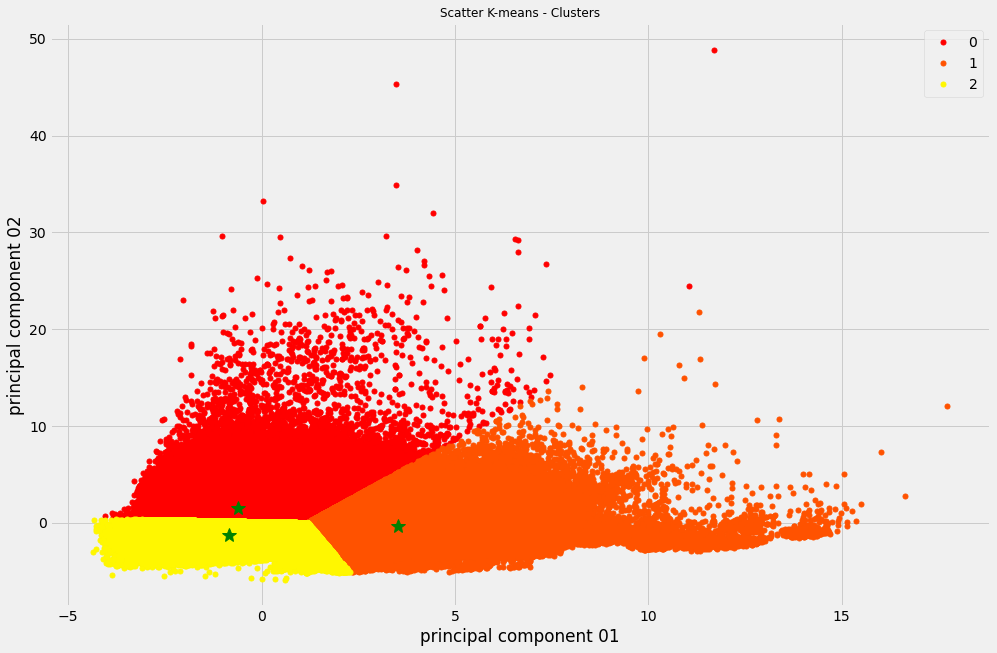

In [143]:
fig, ax1 = plt.subplots(figsize = (15, 10))
ax1.margins(0.05)

#Afegim diferents colors per a cada punt
colors = iter(cm.prism(np.linspace(0, 1, 70)))

for name, group in groups:
    ax1.plot(group.component01, group.component02, marker='o', linestyle='', ms=5, label=name,color=next(colors))
 
ax1.plot(centroids[:,0],centroids[:,1],marker='*',color="g",linestyle="none",markersize=15)

plt.legend()
plt.title("Scatter K-means - Clusters",fontsize=12)
plt.xlabel("principal component 01")
plt.ylabel("principal component 02")
plt.show()

In [137]:
#Provem la predicció
X_new = np.array([[0,1],[-1,1],[10,0]])
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0 0 1]


Calculem amb el mètode del colze "elbow", quin és el número de clusters òptim.

In [139]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    sse.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fac84594a60>
Traceback (most recent call last):
  File "/home/rusi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/rusi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/rusi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/rusi/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

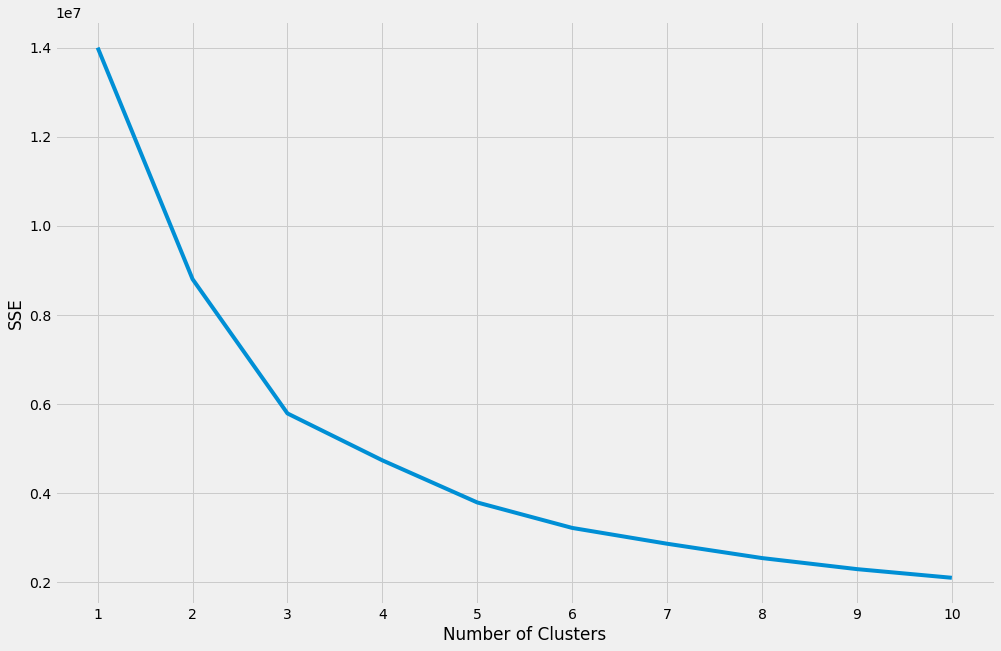

In [148]:
#Dibuix Elbow
plt.style.use("fivethirtyeight")
fig, ax1 = plt.subplots(figsize = (15, 10))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [142]:
#Càlcul numèric Elbow
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

Observem com gràfica i numèricament, el número de clústers òptim és 3, el mateix valor que nosaltres havíem escollit. Per tant, no cal que actualitzem l'algorisme perquè s'ha aplicat amb el valor més addient.

## Exercici 2. Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

Aplicarem l'algorisme sobre els components principals obtinguts de la tècnica de reducció PCA.

In [151]:
dendrogram = sch.dendrogram(sch.linkage(principalDf, method="ward"))

MemoryError: Unable to allocate 13.6 TiB for an array with shape (1875514806903,) and data type float64

Comprovem que ens dona un error de memòria si fem servir el dataframe "principalDf", que és la reducció PCA.
Intentem aplicar el mètode per un petit subset de 1000 mostres al·leatòries.

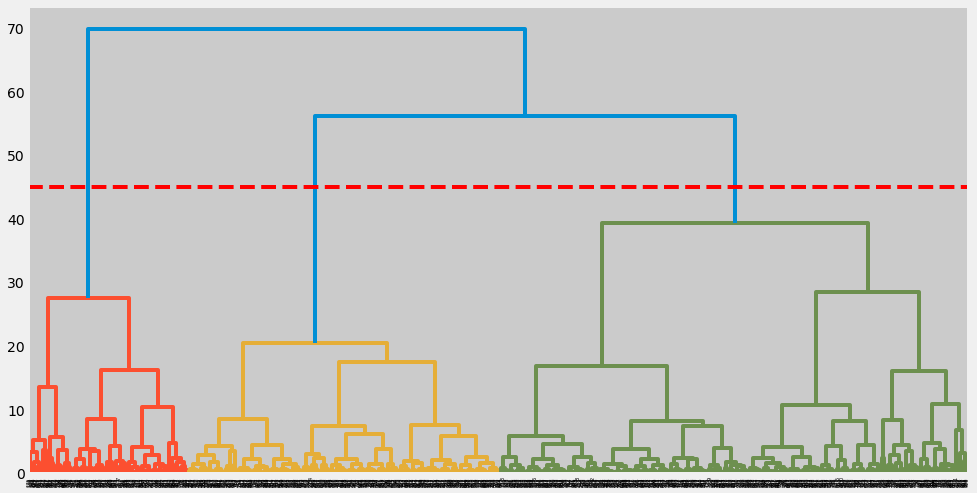

In [190]:
fig, axes = plt.subplots(figsize=(15, 8))
vols06=principalDf.sample(n=1000,random_state=42)
dendrogram = sch.dendrogram(sch.linkage(vols06, method="ward"))
plt.axhline(y=45, color='r', linestyle='--')

El número de clústers o branques òptim seria 3, ja que la línea blava central és la més alta sense atravessar cap altra clúster. Després es dibuixa una línea horitzontal que interseccionaria en el mínim de 3 clústers.

In [175]:
#Imprimim els clústers corresponents a les mostres
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model.fit(vols06)
labels = model.labels_
print(labels)

[0 0 0 0 2 0 0 1 0 0 0 2 1 0 0 0 2 0 1 0 2 2 2 0 0 2 0 2 2 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 2 0 2 2 1 0 1 2 1 2 2 1 0 0 1 0 0 1 0 2 1 2 0 0 0 1 2 0 0 1
 2 0 0 1 0 0 0 1 0 0 1 2 0 0 2 0 2 2 2 0 2 2 0 2 2 1 0 2 0 0 2 0 0 1 2 2 2
 0 0 2 2 1 1 2 2 0 0 1 2 0 2 0 0 0 2 0 0 2 1 0 2 0 0 0 2 0 0 0 2 0 1 2 0 0
 0 2 0 0 0 2 0 2 0 2 1 0 0 0 0 0 2 2 0 0 1 2 0 0 2 2 2 1 2 1 1 0 1 2 0 1 2
 2 0 0 2 0 2 0 0 2 0 2 1 0 1 0 2 0 1 2 0 2 0 0 2 0 0 1 0 2 1 0 2 0 0 0 0 0
 0 2 0 0 2 0 0 1 2 0 1 2 0 1 2 0 0 2 1 1 0 2 0 0 0 0 2 0 0 0 0 2 2 1 2 2 1
 0 0 1 0 0 0 0 2 0 1 2 2 0 2 1 1 2 0 2 2 2 0 0 0 0 0 0 2 1 0 2 0 0 0 0 2 0
 1 2 2 1 0 0 0 0 2 2 1 1 0 1 1 1 1 2 2 0 0 0 0 0 0 2 2 0 2 1 0 0 0 2 1 1 0
 0 2 1 0 0 0 0 0 1 2 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 1 2 2 0 2 0
 0 1 2 0 1 2 2 1 2 2 0 0 0 0 2 0 0 2 2 1 0 1 1 0 2 2 2 0 0 2 0 0 2 0 0 0 0
 2 0 0 2 0 2 0 0 2 0 0 2 1 0 2 1 0 1 2 0 2 0 0 0 2 0 2 0 1 2 0 0 2 1 0 0 2
 2 0 1 0 0 2 0 0 2 2 2 1 0 0 2 0 2 0 2 2 2 2 2 0 0 1 2 0 2 2 0 0 0 2 1 2 0
 0 2 0 0 2 2 2 0 0 0 0 0 

In [177]:
#Afegim una columna amb els valors dels clusters
vols06["Clusters"]=labels
print(vols06.head())

         component01  component02  Clusters
1782417     2.480362     1.826863         0
512712     -0.608376    10.177540         0
447137     -2.444391    -0.209256         0
55082      -2.630624     0.224870         0
877634      0.509112    -3.198179         2


In [178]:
groups = vols06.groupby("Clusters")
print(groups.head())

         component01  component02  Clusters
1782417     2.480362     1.826863         0
512712     -0.608376    10.177540         0
447137     -2.444391    -0.209256         0
55082      -2.630624     0.224870         0
877634      0.509112    -3.198179         2
1056704     1.661652     1.514994         0
532837      3.699424    -0.251564         1
1514241    -0.155554    -1.560247         2
256840      1.130220    -1.383445         1
812083     -0.908807    -0.174881         2
1252870     3.063387    -0.974823         1
841626     -0.662982    -1.097630         2
1192351    -1.318788    -0.922081         2
1514187     2.290765    -0.757369         1
85828       2.935635    -1.347268         1


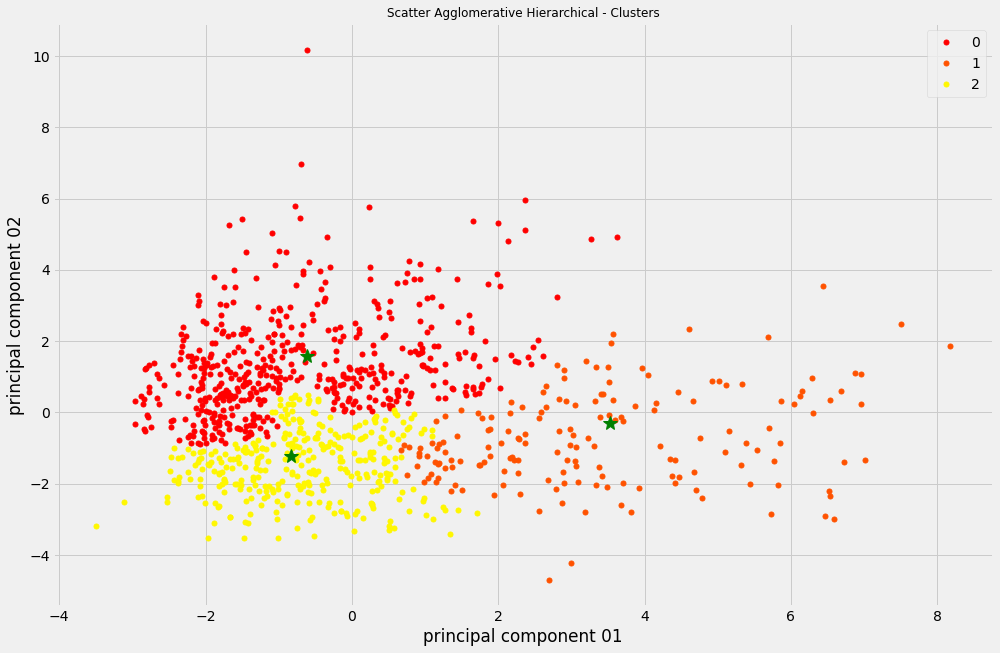

In [201]:
fig, ax1 = plt.subplots(figsize = (15, 10))
ax1.margins(0.05)

#Afegim diferents colors per a cada punt
colors = iter(cm.prism(np.linspace(0, 1, 70)))

for name, group in groups:
    ax1.plot(group.component01, group.component02, marker='o', linestyle='', ms=5, label=name,color=next(colors))
 

#Nota: afegim els centroïds de K-means, ja que no té l'atribut propi la funció Agglomerative
ax1.plot(centroids[:,0],centroids[:,1],marker='*',color="g",linestyle="none",markersize=15)

plt.legend()
plt.title("Scatter Agglomerative Hierarchical - Clusters",fontsize=12)
plt.xlabel("principal component 01")
plt.ylabel("principal component 02")
plt.show()

## Exercici 3. Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster.
2. How far away the data point is from points in other clusters.

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py



In [230]:
vols07=principalDf.sample(n=10000,random_state=42)

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# Afegim els coeficients en un vector
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vols07)
    score=silhouette_score(vols07, kmeans.labels_)
    silhouette_coefficients.append(score)
    
print(silhouette_coefficients)

[0.4150678458764909, 0.36922736884901713, 0.3373610051233614, 0.353115877092912, 0.35515066111478427, 0.3376390724735846, 0.33842217167142774, 0.3393299709432801, 0.3319937033524354]


In [240]:
a=silhouette_samples(vols07,kmeans.labels_)
print(a)
print(len(a))

[0.52422046 0.31316699 0.22288583 ... 0.56982837 0.60008638 0.47884137]
10000


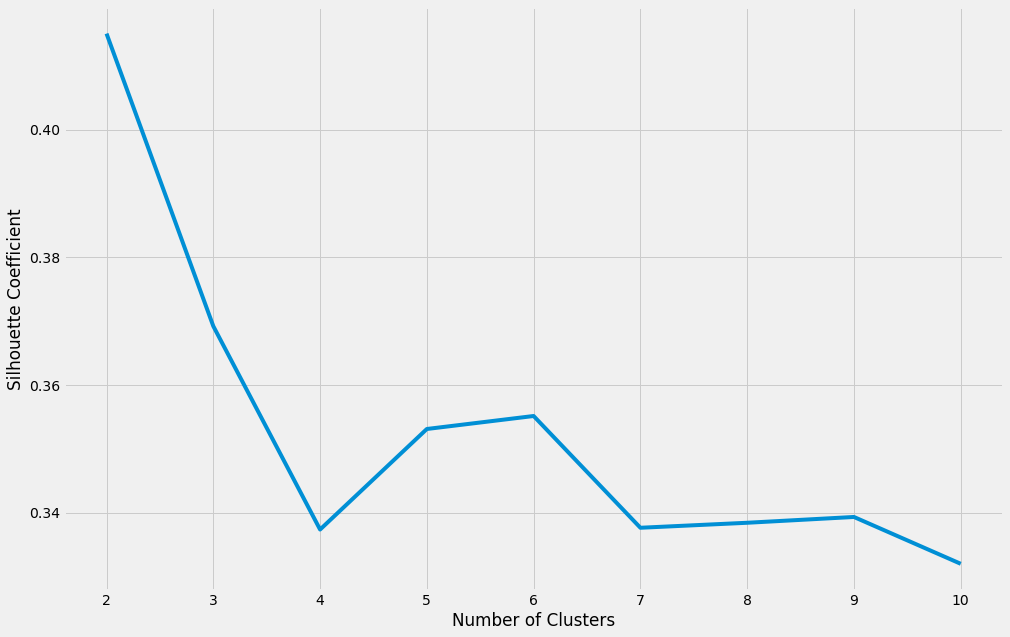

In [228]:
fig, ax1 = plt.subplots(figsize = (15, 10))
ax1.margins(0.05)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Del gràfic observem que 2 i 3 clústers semblan ser les millors opcions per agrupar les dades. El fet que per qüestions de memòria computacional només haguem pogut analitzar 1000 mostres, ens aporta la incògnita del possible resultat. De totes maneres, amb l'algorisme de K-means, resultava el número òptim en 3 clústers.